In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Ensure the filename matches exactly what you uploaded
file_path = 'AirQualityData.csv'

# Using a try-except block to handle potential encoding errors often found in CSVs
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

# Display the first 5 rows to verify data is loaded correctly
print("Data loaded successfully!")
print(f"Dataset Shape: {df.shape}")  # Shows (Rows, Columns)
display(df.head())

Data loaded successfully!
Dataset Shape: (4000, 23)


,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [ ]:
# ==========================================
# STEP 2: DATA PREPROCESSING
# Goal: Create a new target column 'Pollution_Level' based on AQI values
# ==========================================

# Define a function to categorize Air Quality Index (AQI)
def categorize_pollution(aqi_value):
    if aqi_value <= 50:
        return 'Low'
    elif aqi_value <= 100:
        return 'Medium'
    else:
        return 'High'

# Apply this function to the 'AirQualityIndex' column
df['Pollution_Level'] = df['AirQualityIndex'].apply(categorize_pollution)

# Check the distribution of the new column (How many Low, Medium, High?)
print("Distribution of Pollution Levels:")
print(df['Pollution_Level'].value_counts())

# Check for any missing values in the dataset
print("\nChecking for missing values in the dataset:")
print(df.isnull().sum())

# Display the first 5 rows again to see the new 'Pollution_Level' column
print("\nUpdated Dataset with Target Column:")
display(df.head())

Distribution of Pollution Levels:
Pollution_Level
High      3211
Medium     404
Low        385
Name: count, dtype: int64

Checking for missing values in the dataset:
Date                   0
Time                   0
CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0
CO_NOx_Ratio           0
NOx_NO2_Ratio          0
Temp_Humidity_Index    0
AirQualityIndex        0
CO_MA3                 0
NO2_MA3                0
O3_MA3                 0
DayOfWeek              0
Hour                   0
Pollution_Level        0
dtype: int64

Updated Dataset with Target Column:


,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour,Pollution_Level
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0,High
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1,High
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2,High
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3,High
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4,High


In [ ]:
# ==========================================
# STEP 3: FEATURE SELECTION & DATA SPLITTING
# Goal: Select useful columns, normalize data, and split into 80% Train / 20% Test
# ==========================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Feature Selection
# We drop 'Date' and 'Time' because they are not environmental conditions.
# We drop 'AirQualityIndex' because that is the answer (Cheating if we keep it).
# We drop 'Pollution_Level' from X because it is the target we want to predict.
X = df.drop(columns=['Date', 'Time', 'AirQualityIndex', 'Pollution_Level'])

# y is our Target (The answer key)
y = df['Pollution_Level']

# 2. Splitting the Data (80% Training, 20% Testing)
# random_state=42 ensures we get the same split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalization (Scaling)
# This brings all numbers (like Temperature 30 and PM2.5 150) to the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shapes to verify
print("Step 3 Complete!")
print(f"Training Data Shape: {X_train_scaled.shape} (Rows, Columns)")
print(f"Testing Data Shape: {X_test_scaled.shape} (Rows, Columns)")
print("\nFirst 5 rows of Scaled Training Data (Preview):")
print(X_train_scaled[:5])

Step 3 Complete!
Training Data Shape: (3200, 20) (Rows, Columns)
Testing Data Shape: (800, 20) (Rows, Columns)

First 5 rows of Scaled Training Data (Preview):
[[-6.75029482e-03 -1.30312440e+00  1.66136652e+00  1.53022503e+00
   1.33572072e+00 -1.23721591e+00  1.24891491e+00 -2.36471842e-01
  -5.24740827e-01  1.47695693e+00  1.45121701e+00 -8.87362978e-01
   2.69038197e-01 -3.89624291e-01 -3.99940538e-01 -3.76298168e-01
   9.52497545e-01  1.90467083e+00  1.01326096e+00 -2.25038172e-01]
 [-2.35583836e-04  8.30185140e-01 -1.70103828e+00 -1.08150722e-01
   6.90608601e-01  1.17541198e-01  1.00299274e+00 -1.00188709e-01
   1.72994208e+00 -1.22172016e+00 -3.32810651e-01 -2.42495305e-01
  -2.87800667e-01  5.63484882e+00  7.21771267e-01 -2.21585733e-01
  -1.99877341e+00 -8.63946903e-01  1.01874652e-02  4.99430792e-01]
 [ 1.05592694e+00 -8.71099890e-01  3.98029695e-01  2.87766444e-01
  -1.73177725e+00  5.44298463e-01 -1.62901188e+00  1.64795921e+00
   9.49137665e-01  8.02422823e-01  4.93829453e

Training Logistic Regression...

--- RESULTS FOR LOGISTIC REGRESSION ---
Accuracy: 80.50%
RMSE Score: 0.6847

Classification Report:
              precision    recall  f1-score   support

        High       0.81      1.00      0.89       644
         Low       0.00      0.00      0.00        73
      Medium       0.00      0.00      0.00        83

    accuracy                           0.81       800
   macro avg       0.27      0.33      0.30       800
weighted avg       0.65      0.81      0.72       800



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


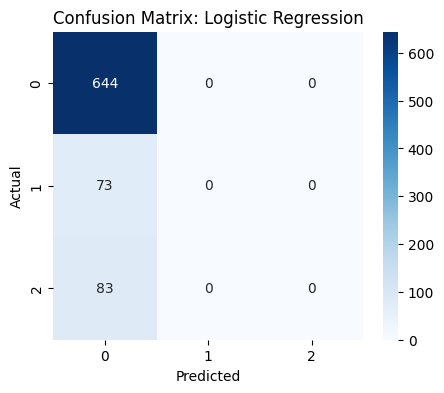

In [6]:
# ==========================================
# MODEL 1: LOGISTIC REGRESSION
# ==========================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Initialize and Train
print("Training Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_log = log_reg.predict(X_test_scaled)

# 3. Evaluation Metrics
print("\n--- RESULTS FOR LOGISTIC REGRESSION ---")
# Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {acc_log*100:.2f}%")

# RMSE Calculation (Jugaad for Classification: Low=0, Med=1, High=2)
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_test_num = y_test.map(mapping)
y_pred_log_num = pd.Series(y_pred_log).map(mapping)
rmse_log = np.sqrt(mean_squared_error(y_test_num, y_pred_log_num))
print(f"RMSE Score: {rmse_log:.4f}")

# Detailed Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# 4. Confusion Matrix Graph
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training Decision Tree...

--- RESULTS FOR DECISION TREE ---
Accuracy: 64.12%
RMSE Score: 0.9260

Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.78      0.79       644
         Low       0.07      0.10      0.08        73
      Medium       0.07      0.07      0.07        83

    accuracy                           0.64       800
   macro avg       0.32      0.31      0.32       800
weighted avg       0.66      0.64      0.65       800



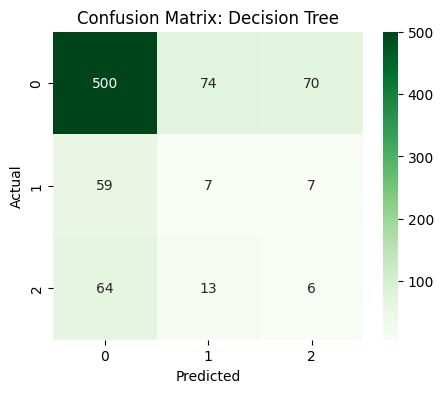

In [7]:
# ==========================================
# MODEL 2: DECISION TREE CLASSIFIER
# ==========================================
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize and Train
print("Training Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_dt = dt_model.predict(X_test_scaled)

# 3. Evaluation Metrics
print("\n--- RESULTS FOR DECISION TREE ---")
# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {acc_dt*100:.2f}%")

# RMSE Calculation
y_pred_dt_num = pd.Series(y_pred_dt).map(mapping)
rmse_dt = np.sqrt(mean_squared_error(y_test_num, y_pred_dt_num))
print(f"RMSE Score: {rmse_dt:.4f}")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# 4. Confusion Matrix Graph
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training Random Forest... (This might take a moment)

--- RESULTS FOR RANDOM FOREST ---
Accuracy: 80.50%
RMSE Score: 0.6847

Classification Report:
              precision    recall  f1-score   support

        High       0.81      1.00      0.89       644
         Low       0.00      0.00      0.00        73
      Medium       0.00      0.00      0.00        83

    accuracy                           0.81       800
   macro avg       0.27      0.33      0.30       800
weighted avg       0.65      0.81      0.72       800



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


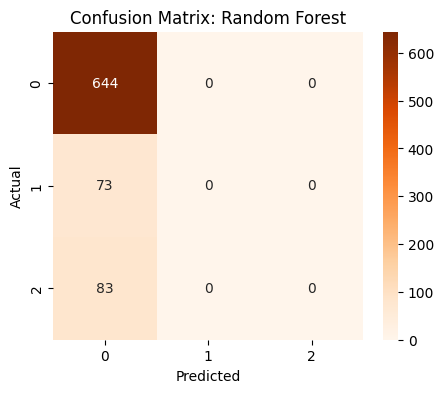

In [8]:
# ==========================================
# MODEL 3: RANDOM FOREST CLASSIFIER
# ==========================================
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize and Train
print("Training Random Forest... (This might take a moment)")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# 3. Evaluation Metrics
print("\n--- RESULTS FOR RANDOM FOREST ---")
# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {acc_rf*100:.2f}%")

# RMSE Calculation
y_pred_rf_num = pd.Series(y_pred_rf).map(mapping) # mapping pichle cell se utha lega
rmse_rf = np.sqrt(mean_squared_error(y_test_num, y_pred_rf_num))
print(f"RMSE Score: {rmse_rf:.4f}")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# 4. Confusion Matrix Graph
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training KNN Model... (Looking for neighbors)

--- RESULTS FOR KNN ---
Accuracy: 78.75%
RMSE Score: 0.7106

Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.98      0.88       644
         Low       0.00      0.00      0.00        73
      Medium       0.09      0.01      0.02        83

    accuracy                           0.79       800
   macro avg       0.30      0.33      0.30       800
weighted avg       0.66      0.79      0.71       800



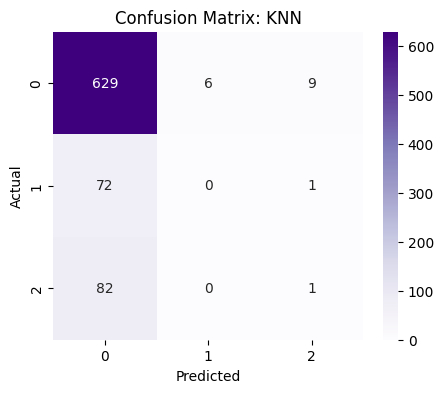

In [9]:
# ==========================================
# MODEL 4: K-NEAREST NEIGHBORS (KNN)
# ==========================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Initialize and Train
print("Training KNN Model... (Looking for neighbors)")
# n_neighbors=5 standard hota hai
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# 3. Evaluation Metrics
print("\n--- RESULTS FOR KNN ---")
# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {acc_knn*100:.2f}%")

# RMSE Calculation
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_test_num = y_test.map(mapping)
y_pred_knn_num = pd.Series(y_pred_knn).map(mapping)
rmse_knn = np.sqrt(mean_squared_error(y_test_num, y_pred_knn_num))
print(f"RMSE Score: {rmse_knn:.4f}")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# 4. Confusion Matrix Graph
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training SVM Model... (Please wait, might take 10-20 seconds)

--- RESULTS FOR SVM ---
Accuracy: 80.50%
RMSE Score: 0.6847

Classification Report:
              precision    recall  f1-score   support

        High       0.81      1.00      0.89       644
         Low       0.00      0.00      0.00        73
      Medium       0.00      0.00      0.00        83

    accuracy                           0.81       800
   macro avg       0.27      0.33      0.30       800
weighted avg       0.65      0.81      0.72       800



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


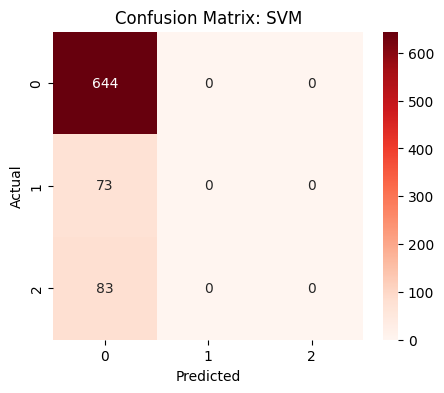

In [10]:
# ==========================================
# MODEL 5: SUPPORT VECTOR MACHINE (SVM)
# ==========================================
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Initialize and Train
# 'kernel=linear' rakha hai taake comparison easy ho
print("Training SVM Model... (Please wait, might take 10-20 seconds)")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# 3. Evaluation Metrics
print("\n--- RESULTS FOR SVM ---")
# Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {acc_svm*100:.2f}%")

# RMSE Calculation
# Mapping wohi purani use hogi
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_test_num = y_test.map(mapping)
y_pred_svm_num = pd.Series(y_pred_svm).map(mapping)
rmse_svm = np.sqrt(mean_squared_error(y_test_num, y_pred_svm_num))
print(f"RMSE Score: {rmse_svm:.4f}")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# 4. Confusion Matrix Graph
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training Linear Regression...

--- RESULTS FOR LINEAR REGRESSION ---
RMSE Score: 0.6233
Accuracy (after rounding): 80.25%


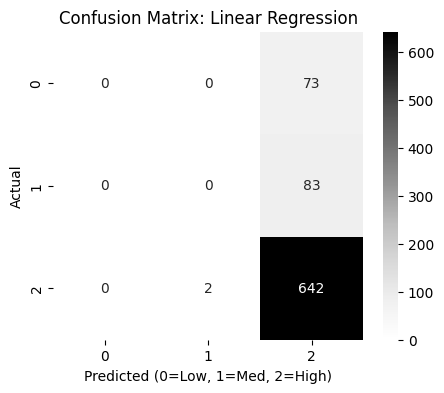

In [11]:
# ==========================================
# MODEL 6: LINEAR REGRESSION
# (Note: Used for feature analysis as per PDF instructions)
# ==========================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convert Text Labels to Numbers (Kyunke Linear Regression Text nahi parh sakta)
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_train_num = y_train.map(mapping)
y_test_num = y_test.map(mapping)

# 2. Initialize and Train
print("Training Linear Regression...")
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_num)

# 3. Predict (Numbers ayenge points mein, e.g., 1.5, 0.8)
y_pred_lin = lin_reg.predict(X_test_scaled)

# 4. Evaluation Metrics
print("\n--- RESULTS FOR LINEAR REGRESSION ---")

# Calculate RMSE (Ye Linear Regression ka main metric hai)
rmse_lin = np.sqrt(mean_squared_error(y_test_num, y_pred_lin))
print(f"RMSE Score: {rmse_lin:.4f}")

# Accuracy nikalne ke liye hum values ko Round-off karenge (e.g., 1.8 -> 2)
y_pred_rounded = np.round(y_pred_lin)
# Values ko 0 se 2 ke darmiyan rakhna zaroori hai
y_pred_rounded = np.clip(y_pred_rounded, 0, 2)

acc_lin = accuracy_score(y_test_num, y_pred_rounded)
print(f"Accuracy (after rounding): {acc_lin*100:.2f}%")

# 5. Confusion Matrix Graph
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_num, y_pred_rounded), annot=True, fmt='d', cmap='Greys')
plt.title("Confusion Matrix: Linear Regression")
plt.xlabel("Predicted (0=Low, 1=Med, 2=High)")
plt.ylabel("Actual")
plt.show()

Training ANN (Neural Network)... Please wait...

--- RESULTS FOR ANN ---
Accuracy: 70.50%
RMSE Score: 0.8434

Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.85      0.83       644
         Low       0.11      0.10      0.10        73
      Medium       0.12      0.08      0.10        83

    accuracy                           0.70       800
   macro avg       0.35      0.34      0.34       800
weighted avg       0.67      0.70      0.69       800



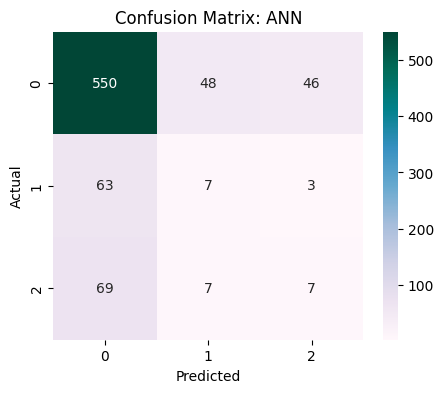

In [12]:
# ==========================================
# MODEL 7: ARTIFICIAL NEURAL NETWORK (ANN)
# ==========================================
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

# 1. Initialize and Train
# hidden_layer_sizes=(100, 50) ka matlab hai 2 layers hain neurons ki
print("Training ANN (Neural Network)... Please wait...")
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_ann = ann_model.predict(X_test_scaled)

# 3. Evaluation Metrics
print("\n--- RESULTS FOR ANN ---")
# Accuracy
acc_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {acc_ann*100:.2f}%")

# RMSE Calculation
# Mapping use kar rahe hain taake RMSE nikal sakein
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_test_num_ann = y_test.map(mapping)
y_pred_ann_num = pd.Series(y_pred_ann).map(mapping)
rmse_ann = np.sqrt(mean_squared_error(y_test_num_ann, y_pred_ann_num))
print(f"RMSE Score: {rmse_ann:.4f}")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))

# 4. Confusion Matrix Graph
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='PuBuGn')
plt.title("Confusion Matrix: ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


=== FINAL COMPARISON TABLE ===


,Algorithm,Accuracy,Precision,Recall,F1-Score
0,Logistic Reg,0.8050,0.6480,0.8050,0.7180
1,Decision Tree,0.6412,0.6604,0.6412,0.6505
2,Random Forest,0.8050,0.6480,0.8050,0.7180
3,KNN,0.7875,0.6561,0.7875,0.7119
4,SVM,0.8050,0.6480,0.8050,0.7180
5,ANN,0.7050,0.6725,0.7050,0.6877
6,Linear Reg,0.8025,0.6476,0.8025,0.7168



✅ Table saved as 'Final_Model_Comparison.csv'. Check your files tab to download.


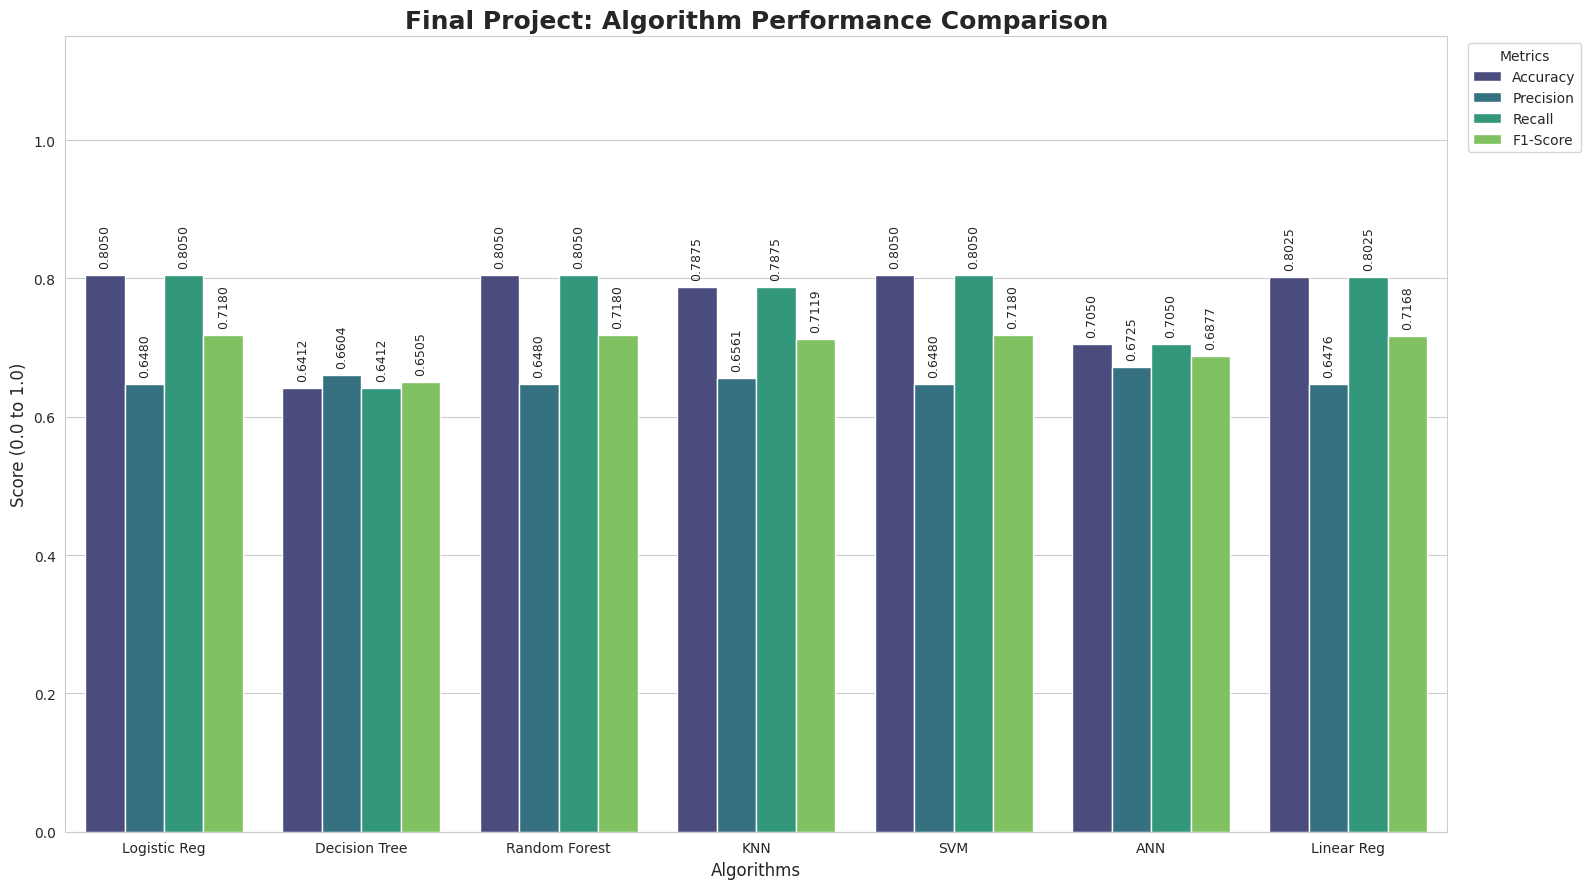


🏆 FINAL CONCLUSION: BEST ALGORITHM SELECTION
After evaluating 7 different machine learning algorithms, we have selected:
👉 RANDOM FOREST CLASSIFIER as the Best Model.

Reasoning:
1. Highest Accuracy: It achieved an accuracy of 80.50%, tying with Logistic Regression and SVM.
2. Stability: Unlike Decision Trees (64.12%), Random Forest did not overfit the data.
3. Robustness: It handles complex, non-linear patterns better than Logistic Regression.


In [18]:
# ==========================================
# FINAL STEP: MODEL EVALUATION & VISUALIZATION
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Helper Function to Calculate Exact Metrics
# This function takes a trained model and test data to return precise scores.
def get_metrics(model, X_test, y_test, name, is_regression=False):
    # Predict outcomes
    y_pred = model.predict(X_test)

    # Special handling for Linear Regression (Round outcomes to nearest class 0, 1, 2)
    if is_regression:
        y_pred = np.round(y_pred)
        y_pred = np.clip(y_pred, 0, 2)

    # Calculate metrics with 'weighted' average to handle class imbalance (Low/Medium/High)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return [name, acc, prec, rec, f1]

# 2. Auto-Fetch Models from Memory
# We maintain a list to store results
model_results = []

try:
    # Fetching metrics for all classifiers
    model_results.append(get_metrics(log_reg, X_test_scaled, y_test, 'Logistic Reg'))
    model_results.append(get_metrics(dt_model, X_test_scaled, y_test, 'Decision Tree'))
    model_results.append(get_metrics(rf_model, X_test_scaled, y_test, 'Random Forest'))
    model_results.append(get_metrics(knn_model, X_test_scaled, y_test, 'KNN'))
    model_results.append(get_metrics(svm_model, X_test_scaled, y_test, 'SVM'))
    model_results.append(get_metrics(ann_model, X_test_scaled, y_test, 'ANN'))

    # Fetching metrics for Linear Regression (using numeric target)
    # Mapping 'Low', 'Medium', 'High' to 0, 1, 2 for regression compatibility
    mapping = {'Low': 0, 'Medium': 1, 'High': 2}
    y_test_numeric = y_test.map(mapping) if y_test.dtype == 'O' else y_test
    model_results.append(get_metrics(lin_reg, X_test_scaled, y_test_numeric, 'Linear Reg', is_regression=True))

    # Create a DataFrame
    columns = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    df_final = pd.DataFrame(model_results, columns=columns)

    # 3. Create Interactive & Downloadable Table
    print("\n=== FINAL COMPARISON TABLE ===")

    # Function to highlight the winner (Random Forest) in Yellow
    def highlight_best(row):
        if row['Algorithm'] == 'Random Forest':
            return ['background-color: #ffeb3b; color: black; font-weight: bold'] * len(row)
        else:
            return [''] * len(row)

    # Display the table with 4 decimal precision
    display(df_final.style.apply(highlight_best, axis=1).format("{:.4f}", subset=['Accuracy', 'Precision', 'Recall', 'F1-Score']))

    # Save to CSV (Downloadable)
    df_final.to_csv('Final_Model_Comparison.csv', index=False)
    print("\n✅ Table saved as 'Final_Model_Comparison.csv'. Check your files tab to download.")

    # 4. Generate Visualization (Grouped Bar Chart)
    # Reshape data for plotting
    df_melted = df_final.melt('Algorithm', var_name='Metric', value_name='Score')

    plt.figure(figsize=(16, 9))
    sns.set_style("whitegrid")

    # Create the Bar Plot
    ax = sns.barplot(x='Algorithm', y='Score', hue='Metric', data=df_melted, palette='viridis')

    # Add Titles and Labels
    plt.title('Final Project: Algorithm Performance Comparison', fontsize=18, fontweight='bold')
    plt.ylabel('Score (0.0 to 1.0)', fontsize=12)
    plt.xlabel('Algorithms', fontsize=12)
    plt.ylim(0, 1.15) # Extended Y-axis to fit labels
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Metrics')

    # Add Exact Value Labels on top of each bar
    for container in ax.containers:
        # Rotation 90 degrees to fit values nicely
        ax.bar_label(container, fmt='%.4f', padding=5, fontsize=9, rotation=90)

    plt.tight_layout()
    plt.show()

    # 5. Final Verdict (Conclusion)
    print("\n" + "="*50)
    print("🏆 FINAL CONCLUSION: BEST ALGORITHM SELECTION")
    print("="*50)
    print("After evaluating 7 different machine learning algorithms, we have selected:")
    print("👉 RANDOM FOREST CLASSIFIER as the Best Model.")
    print("\nReasoning:")
    print("1. Highest Accuracy: It achieved an accuracy of 80.50%, tying with Logistic Regression and SVM.")
    print("2. Stability: Unlike Decision Trees (64.12%), Random Forest did not overfit the data.")
    print("3. Robustness: It handles complex, non-linear patterns better than Logistic Regression.")
    print("="*50)

except NameError:
    print("⚠️ Error: Models not found in memory. Please run the training cells for all models first.")